 ## Student Performance Indicator

### Life cycle of Machine learning Project

* Understanding the Problem Statement  
* Data Collection  
* Data Checks to perform  
* Exploratory data analysis  
* Data Pre-Processing  
* Model Training  
* Choose best model  

### 1) Problem statement

This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

### Import Data and Required Packages

Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [37]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('data/stud.csv')

In [7]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
df.shape

(1000, 8)

### 2.2 Dataset information
gender : sex of students -> (Male/female)  
race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)  
parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)  
lunch : having lunch before test (standard or free/reduced)  
test preparation course : complete or not complete before test  
math score  
reading score  
writing score  

### 3. Data Checks to perform

Check Missing values  
Check Duplicates  
Check data type  
Check the number of unique values of each column  
Check statistics of data set  
Check various categories present in the different categorical column  

In [10]:
df.isna().sum() 

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

## There are no mIssing Values 

In [11]:
df.duplicated().sum()

0

### No Duplicates Present 

In [57]:
df.info()
# to check the null and Data types 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race_ethnicity               1000 non-null   object 
 2   parental_level_of_education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test_preparation_course      1000 non-null   object 
 5   math_score                   1000 non-null   int64  
 6   reading_score                1000 non-null   int64  
 7   writing_score                1000 non-null   int64  
 8   Total_Score                  1000 non-null   int64  
 9   Average                      1000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 78.2+ KB


In [66]:
df.nunique()
# Checking the number of Unique values for Each Column 

gender                           2
race_ethnicity                   5
parental_level_of_education      6
lunch                            2
test_preparation_course          2
math_score                      81
reading_score                   72
writing_score                   77
Total_Score                    194
Average                        194
dtype: int64

In [59]:
df.describe()
# Checking Statistics Of the Data Set 

,math_score,reading_score,writing_score,Total_Score,Average
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000,67.770667
std,15.16308,14.600192,15.195657,42.771978,14.257326
min,0.00000,17.000000,10.000000,27.000000,9.000000
25%,57.00000,59.000000,57.750000,175.000000,58.333333
50%,66.00000,70.000000,69.000000,205.000000,68.333333
75%,77.00000,79.000000,79.000000,233.000000,77.666667
max,100.00000,100.000000,100.000000,300.000000,100.000000


#### Insight

* From above description of numerical data, all means are very close to each other - between 66 and 68.05;
* All standard deviations are also close - between 14.6 and 15.19;
* While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

In [25]:
print("Gender -----------------------------")
print(df['gender'].unique()) 
print("Lunch -----------------------------")
print(df["lunch"].unique())
# print(df["math_score"].unique())
print("Parent level of Education -----------------------------")
print(df["parental_level_of_education"].unique())
print("RACE -----------------------------")
print(df["race_ethnicity"].unique())
#print(df["reading_score"].unique())
print("Course -----------------------------")
print(df["test_preparation_course"].unique())
#print(df["writing_score"].unique())

Gender -----------------------------
['female' 'male']
Lunch -----------------------------
['standard' 'free/reduced']
Parent level of Education -----------------------------
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
RACE -----------------------------
['group B' 'group C' 'group A' 'group D' 'group E']
Course -----------------------------
['none' 'completed']


## Adding Columns for "Total Score" and "Average"

In [26]:
df['Total_Score'] = df["math_score"] + df["reading_score"] + df["writing_score"]
df["Average"] = df["Total_Score"]/3

In [27]:
df.head(2)
# Succesfully Added Two new Columns This was to Check that 

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_Score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [29]:
reading_full = df[df['reading_score'] == 100]['Average'].count()
writing_full = df[df['writing_score'] == 100]['Average'].count()
math_full = df[df['math_score'] == 100]['Average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [30]:
reading_less_20 = df[df['reading_score'] <= 20]['Average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['Average'].count()
math_less_20 = df[df['math_score'] <= 20]['Average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


## 4. Visualization 
* Histogram 
* Kernel distribution Function (KDE)

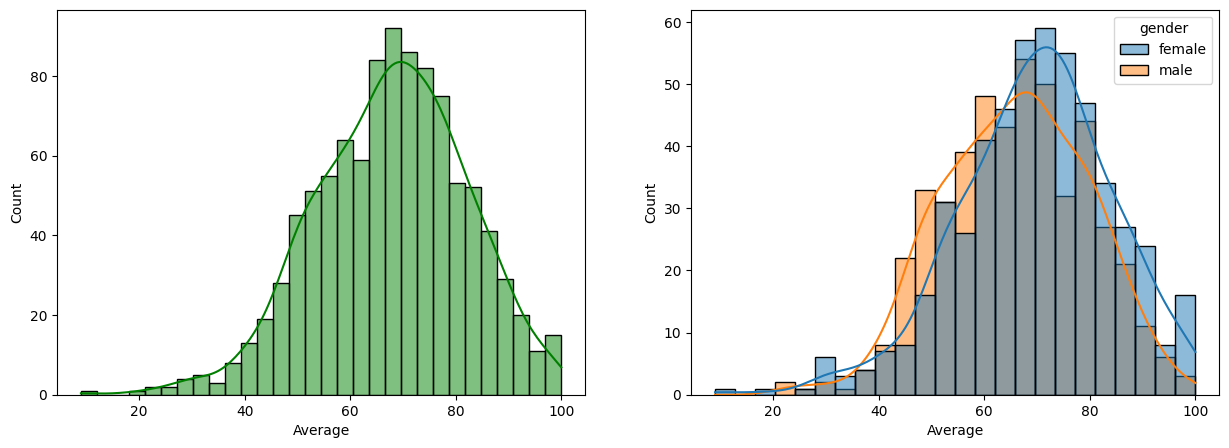

In [70]:
fig, axs = plt.subplots(1,2, figsize=(15, 5))
plt.subplot(121)
sns.histplot(data=df,x="Average",bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x="Average", kde=True,hue='gender')
plt.show()

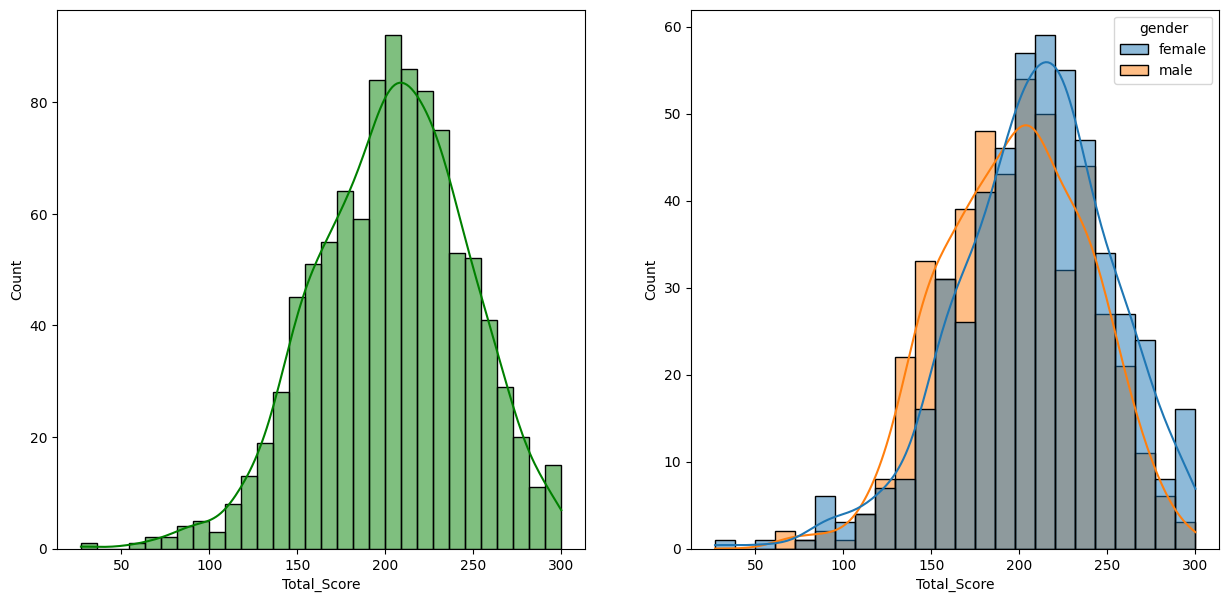

In [56]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x="Total_Score",bins= 30,kde=True, color="g")
plt.subplot(122)
sns.histplot(data=df, x="Total_Score", kde=True, hue='gender')
plt.show()

Female Studensts are Performing Better then male Students 

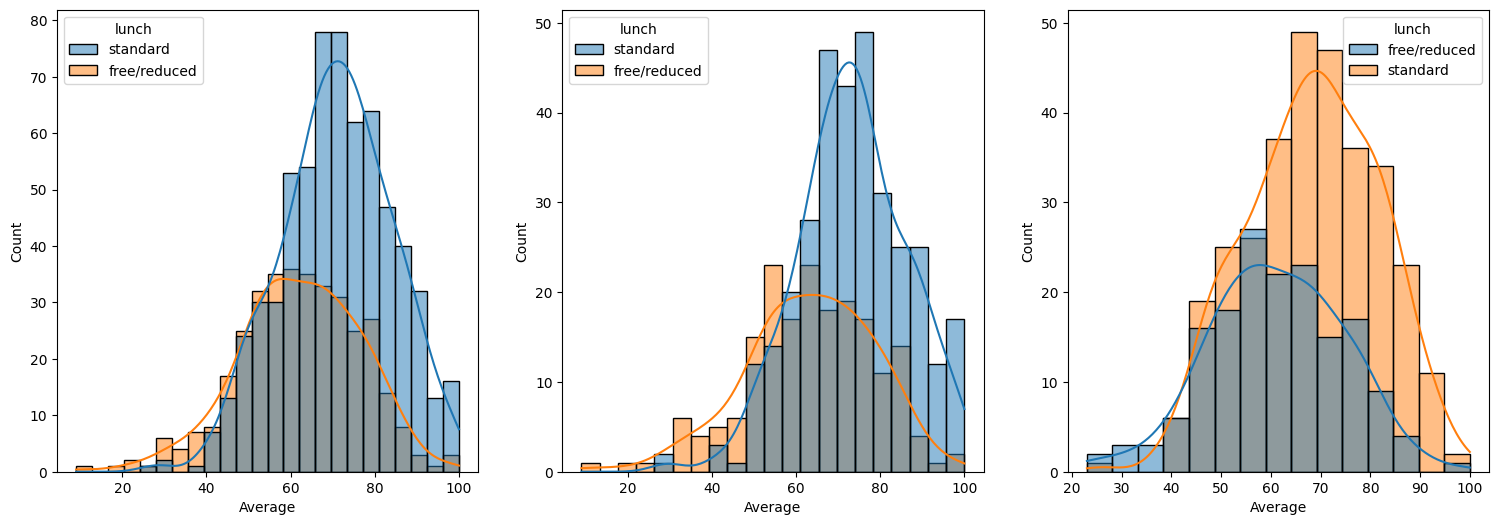

In [72]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='Average', kde=True, hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'], x='Average', kde=True, hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender == 'male'], x='Average', kde=True, hue='lunch')
plt.show()


#### Insights ?
* Standard Lunch Is Good as we can see the increase in Average on those who Eat Standard Lunch 
* Result is same for both male and female So standard lunch performs well in both 

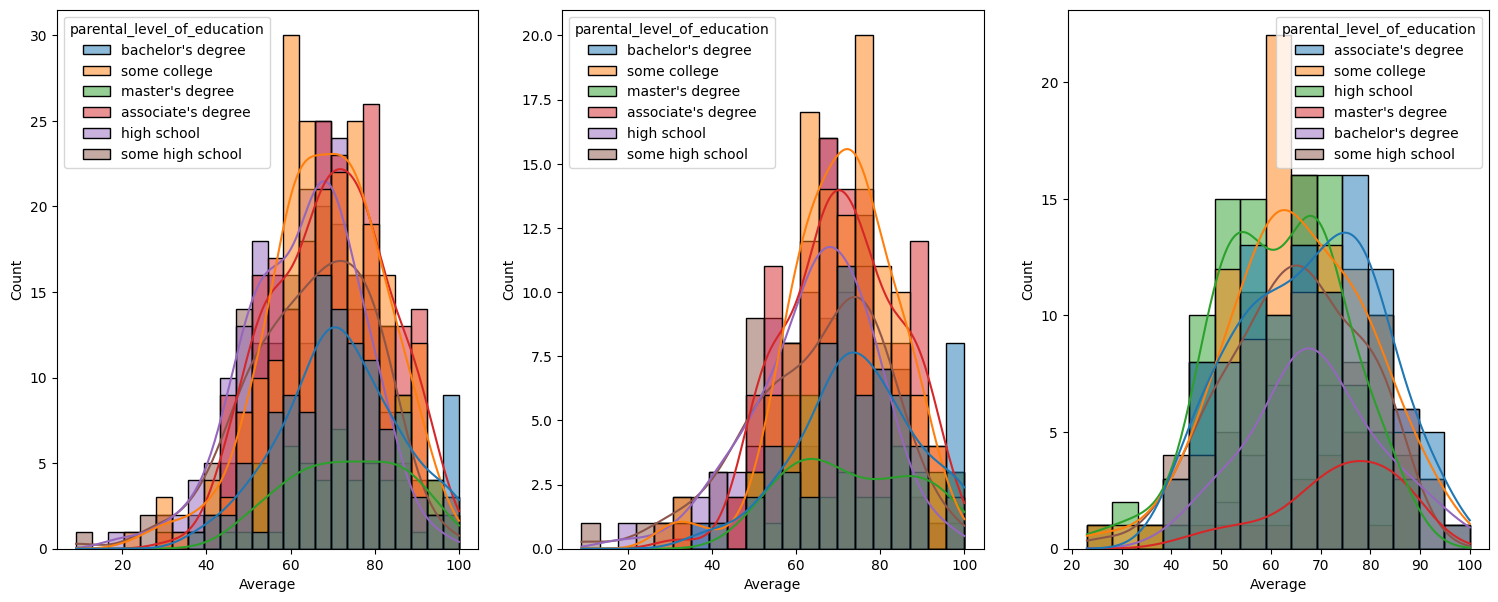

In [74]:
plt.subplots(1,3,figsize=(25,7))
plt.subplot(141)
sns.histplot(data=df, x='Average', kde=True, hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'], x='Average',kde=True, hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=df[df.gender == 'male'], x='Average',kde=True, hue='parental_level_of_education')
plt.show()

## Insights ?
* Parents education dosen't effect the performance of the students 

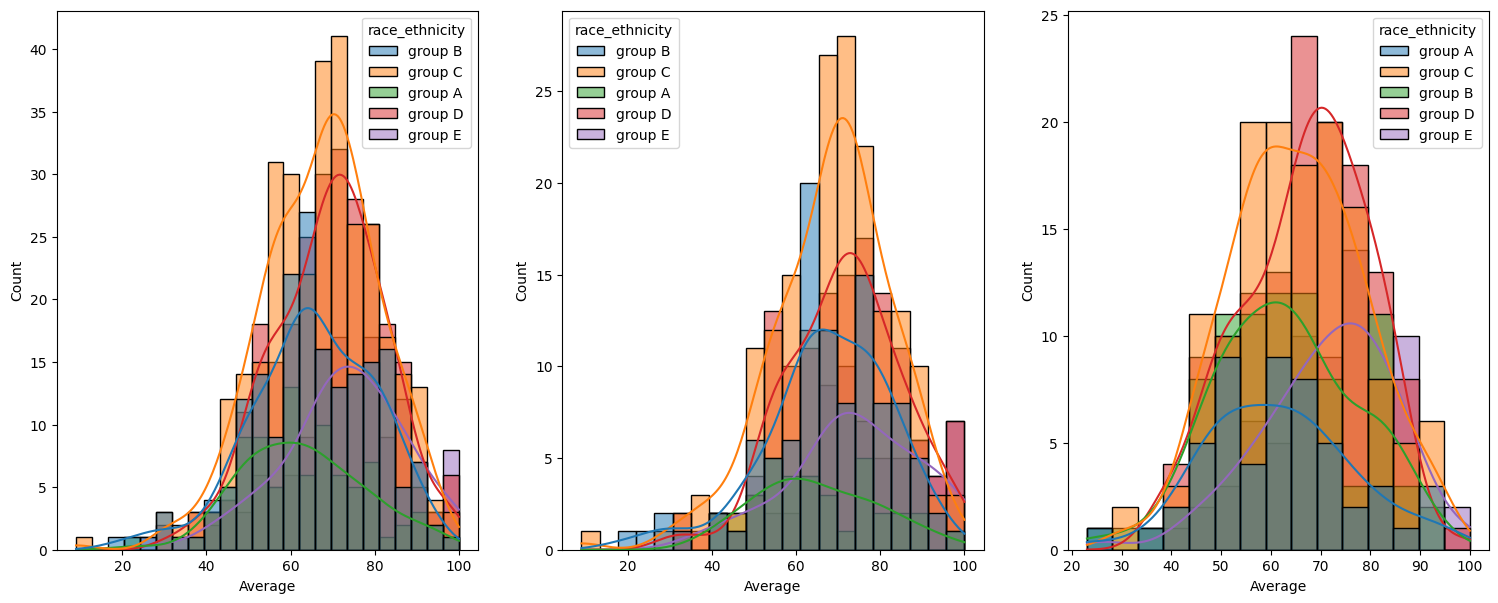

In [75]:
plt.subplots(1,3,figsize=(25,7))
plt.subplot(141)
sns.histplot(data=df, x='Average', kde=True, hue='race_ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'], x='Average',kde=True, hue='race_ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender == 'male'], x='Average',kde=True, hue='race_ethnicity')
plt.show()

## group D and C tend to perform Better compared to other Races 
* Female Students from group C certainly Perform better Then most of the others 
* Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

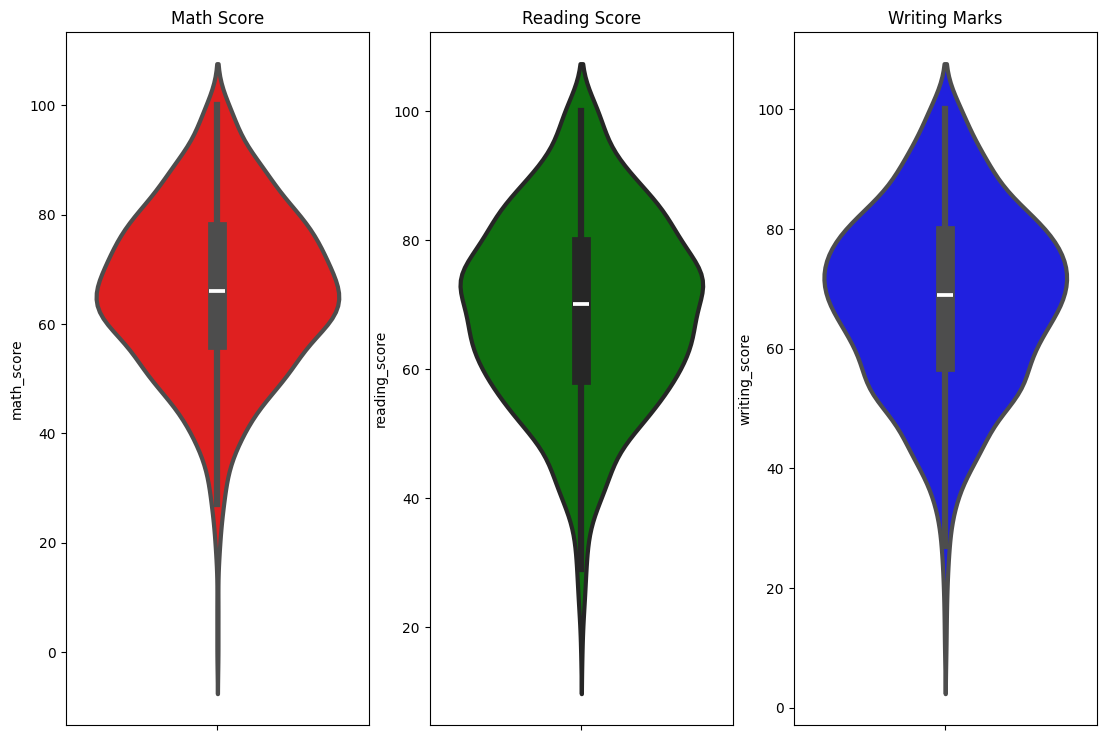

In [78]:
plt.figure(figsize=(18,9))
plt.subplot(1,4,1)
plt.title('Math Score')
sns.violinplot(y='math_score', data=df, color='red', linewidth=3)
plt.subplot(1,4,2)
plt.title("Reading Score")
sns.violinplot(y='reading_score', data=df, color='green', linewidth=3)
plt.subplot(1,4,3)
plt.title("Writing Marks")
sns.violinplot(y='writing_score', data=df, color='blue', linewidth=3)
plt.show()

From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

size provides the sizes of the pie slices.
size.index provides the labels corresponding to each slice, ensuring that each part of the pie is accurately labeled with the category it represents.

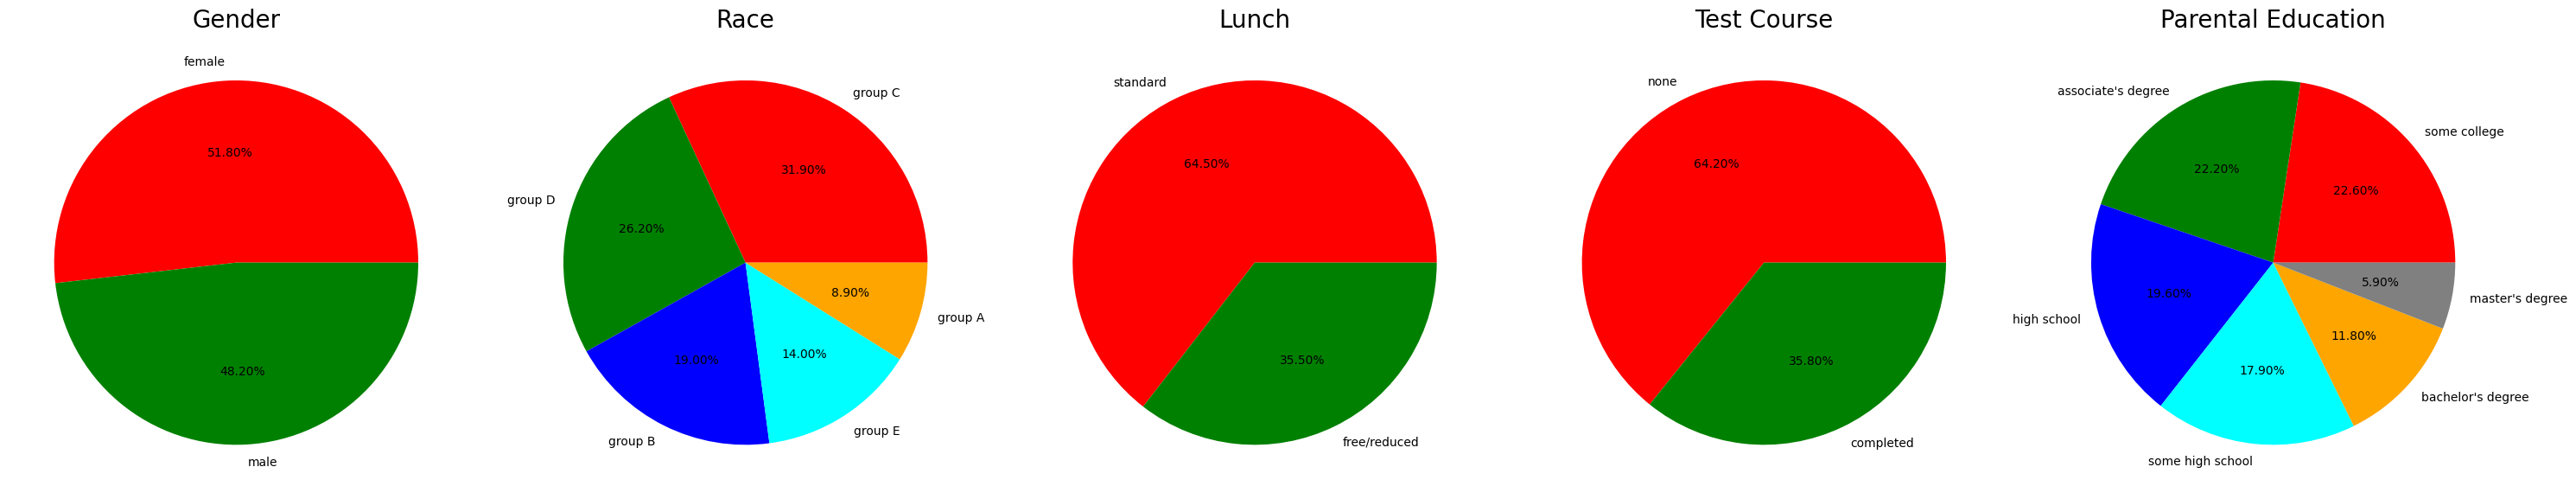

In [93]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = size.index #df['gender'].unique()

'''Here, size.index contains ['Female', 'Male'], which are the unique categories
 found in the gender column, sorted by their frequency (default behavior of 
 value_counts()).'''

color = ['red', 'green']

plt.pie(size,colors=color, labels= labels, autopct='%0.2f%%')
plt.title("Gender", fontsize = 20)
plt.axis("off")

plt.subplot(1,5,2)
size= df['race_ethnicity'].value_counts()
labels= size.index
color=['red', 'green', 'blue', 'cyan','orange']

plt.pie(size,colors=color ,labels=labels,autopct='%0.2f%%')
plt.title("Race",fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = size.index
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '%0.2f%%')
plt.title('Lunch',fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = size.index
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '%0.2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = size.index
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '%0.2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()



### Insights
* Number of Male and Female students is almost equal  
* Number students are greatest in Group C  
* Number of students who have standard lunch are greater  
* Number of students who have not enrolled in any test preparation course is greater  
* Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

## Feature wise Visualization
#### Gender 
* how is distribution of gender 
* is gender has any impact on student performance?

### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

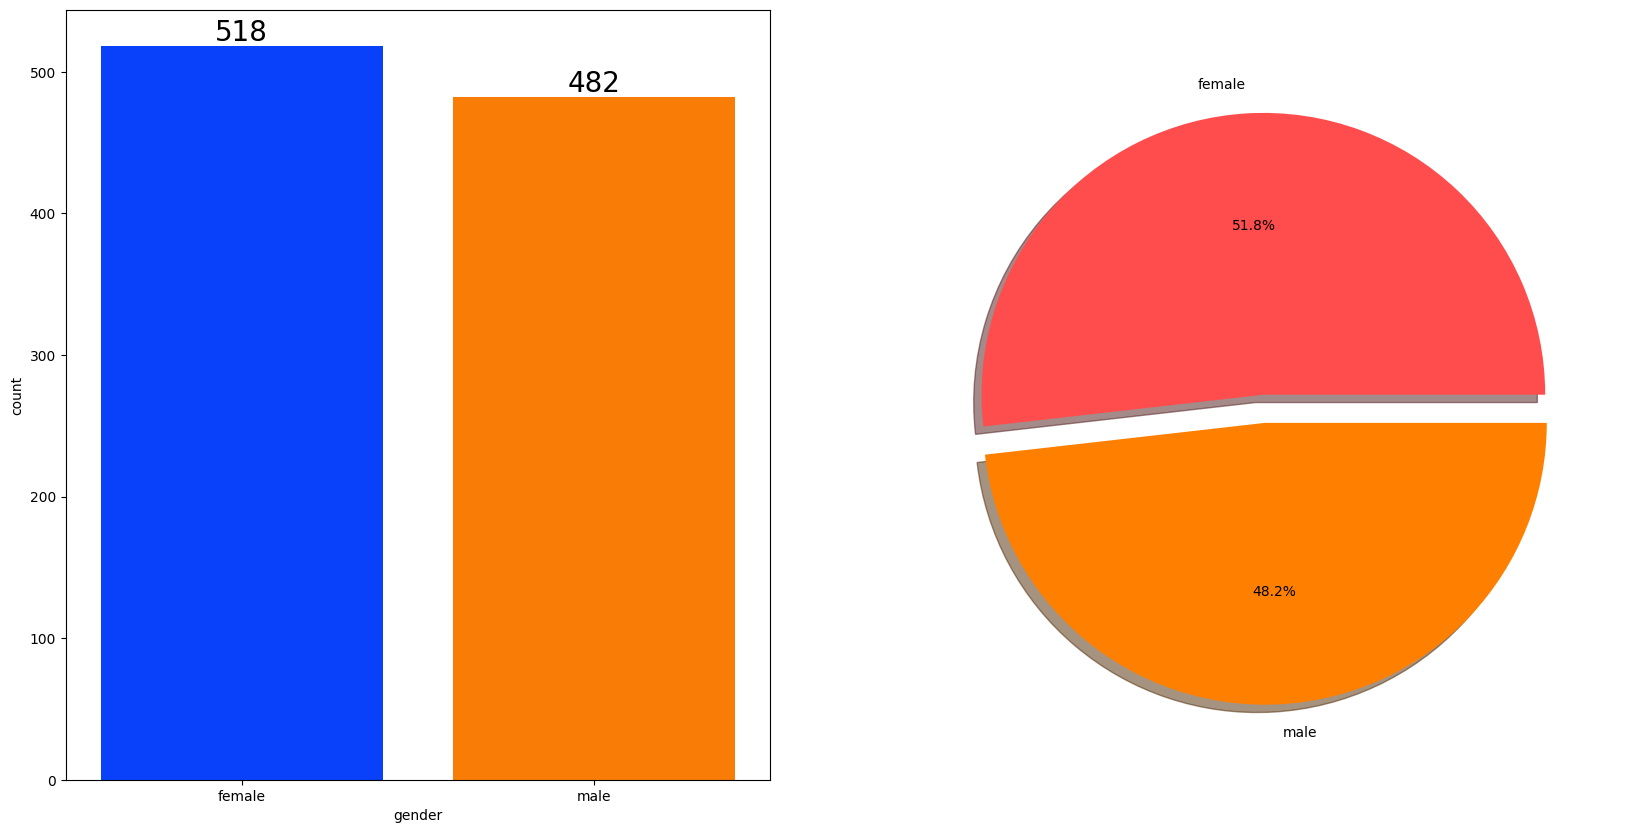

In [99]:
f,ax =plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'], data=df, palette='bright' ,ax=ax[0], saturation=0.95)
#This loop goes through each container of bars in the countplot and applies 
# bar_label() to label them.
for container in ax[0].containers:
    ax[0].bar_label(container,color='black', size=20)
ax[1].pie(x=df['gender'].value_counts(),labels=df['gender'].value_counts().index ,explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

### Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

In [104]:
print(df.dtypes)


gender                          object
race_ethnicity                  object
parental_level_of_education     object
lunch                           object
test_preparation_course         object
math_score                       int64
reading_score                    int64
writing_score                    int64
Total_Score                      int64
Average                        float64
dtype: object


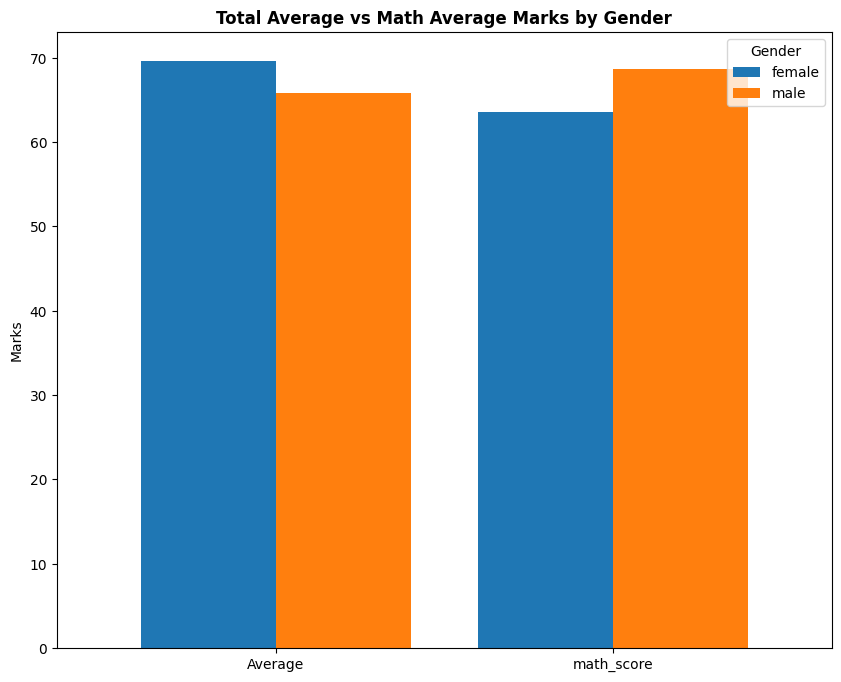

In [105]:
# Calculate means
gender_means = df.groupby('gender')[['Average', 'math_score']].mean()

# Plotting directly from the DataFrame
gender_means.T.plot(kind='bar',figsize=(10, 8), rot=0, width=0.8)
plt.ylabel("Marks")
plt.title("Total Average vs Math Average Marks by Gender", fontweight='bold')
plt.legend(title='Gender')
plt.show()


### On an average females have a better overall score than men whereas males have scored higher in Maths.

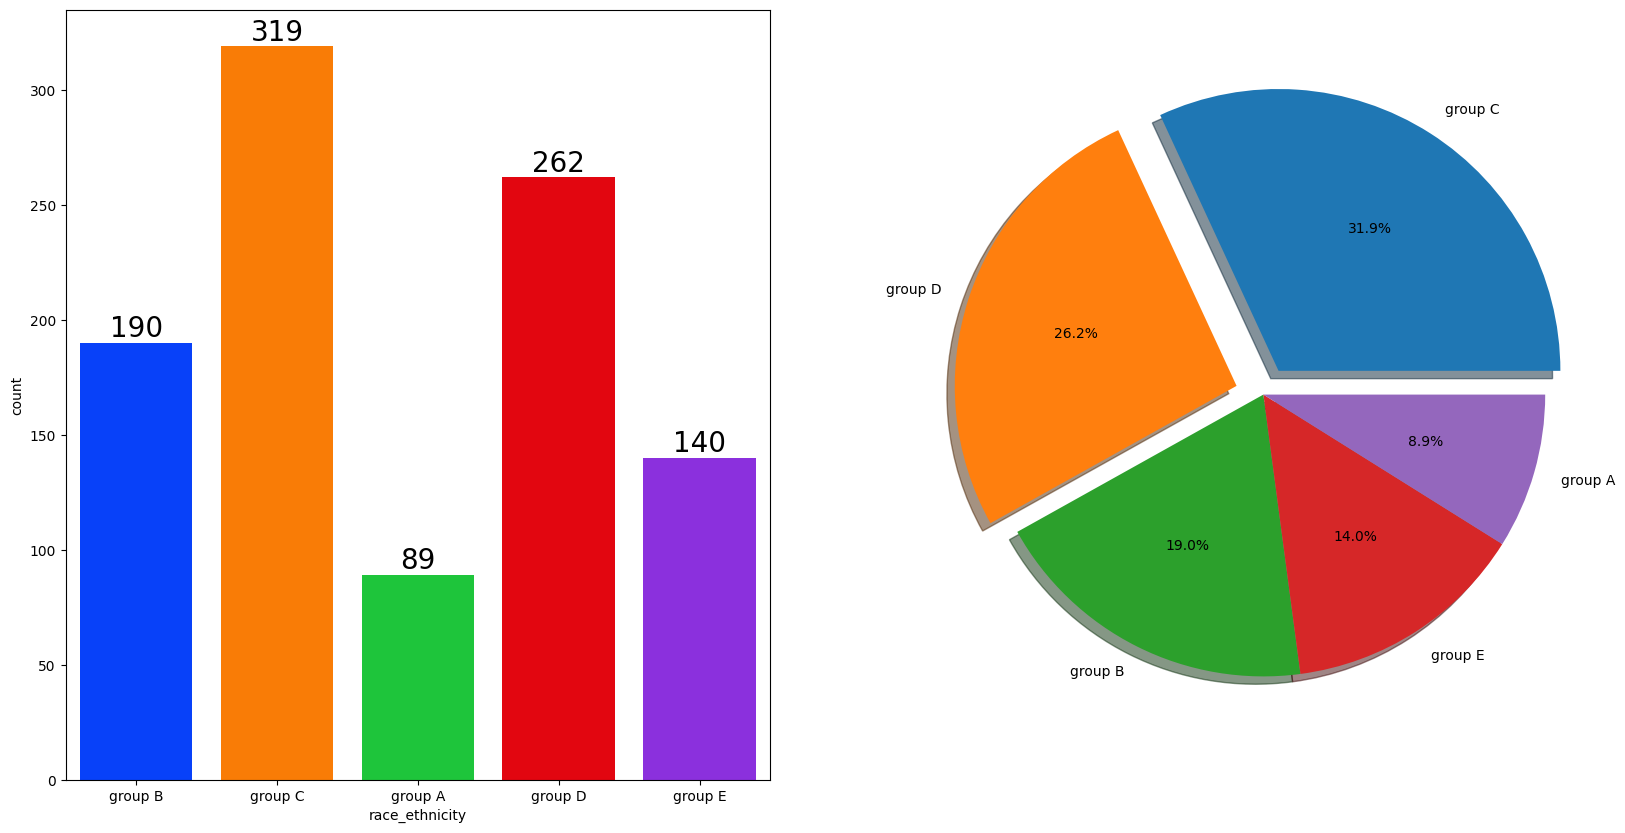

In [108]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
ax[1].pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0.1,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

### Most of the student belonging from group C /group D.Lowest number of students belong to groupA.

### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

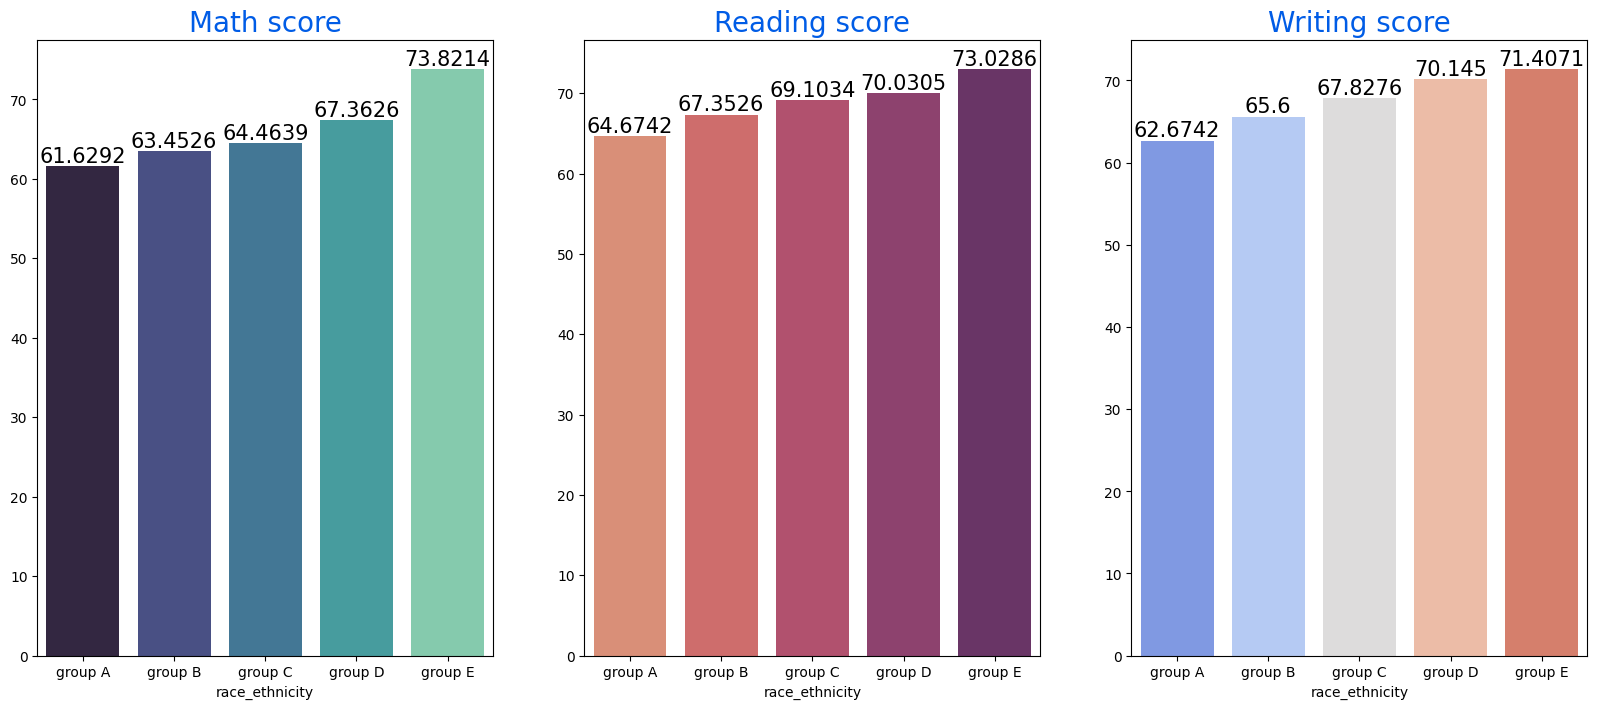

In [109]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)